# Lab-6:
## Exercise-1:

> Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
sb.set_theme()

#### Question-1: Write down the meta information about the “wine.csv” data file available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Wine.

> #### Meta Data:
> These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
>
>I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b , I would not know which 13 variables are included in the set.
>
> The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
> 1) Alcohol
> 2) Malic acid
> 3) Ash
> 4) Alcalinity of ash
> 5) Magnesium
> 6) Total phenols
> 7) Flavanoids
> 8) Nonflavanoid phenols
> 9) Proanthocyanins
> 10)Color intensity
> 11)Hue
> 12)OD280/OD315 of diluted wines
> |13)Proline
>
>.

In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

#### Question-2: Tabulate and visualize the distribution of the numeric variables.

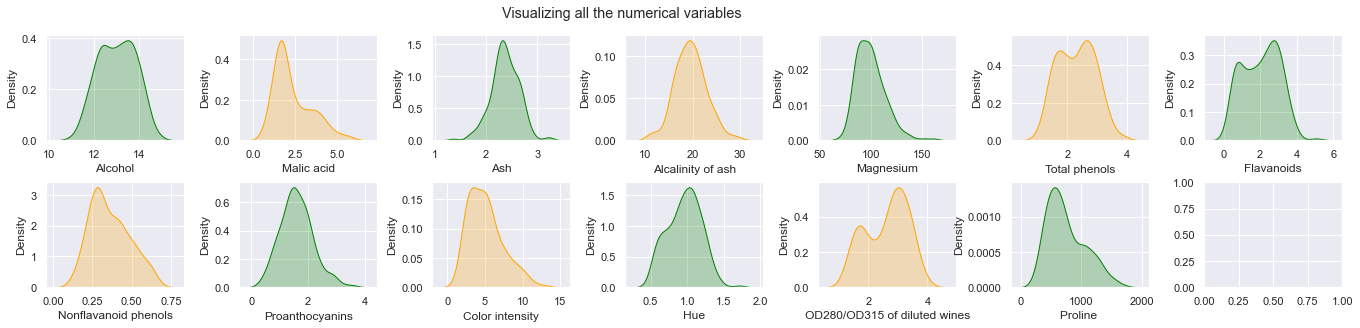

In [4]:
fig, axes = plt.subplots(2,7, figsize=(20,5))
fig.suptitle("Visualizing all the numerical variables")
counter = 1
for i in range(2):
    for j in range(7):
        if i == 1 and j == 6:
            break
        if counter%2==0:
            sb.kdeplot(ax=axes[i,j],data=wine, x=wine[wine.columns[counter]], shade=True, color='orange')
        else:
            sb.kdeplot(ax=axes[i,j],data=wine, x=wine[wine.columns[counter]], shade=True, color='green')
        if counter<13:
            counter=counter+1

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1.0, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


#### Question-3: Perform  the  required  preprocessing  ,  70,30  split  and  build  a  classifier  using  the Multi-Layer  Perceptron  Classifier  model  available  in  SciKit  Learn.  Use  3  layers with  the  same  number  of  neurons  as  there  are  features  along  with  500  max iterations.

In [5]:
X = wine.drop('Class', axis=1)
y = wine['Class']

> Scaling the data:

In [6]:
sc = StandardScaler()

In [7]:
X = pd.DataFrame(sc.fit_transform(X))

> Splitting the dataset into training and testing:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

> Building the MLP Classifier model:

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
model = clf.fit(X=X_train, y=y_train)

> Predicting values for the test data

In [10]:
y_pred = model.predict(X_test)

#### Question-4: Tabulate the precision, recall and F1-score.

In [11]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



#### Question-5: Display the  MLP weights and biases after training your model.

> MLP weights:

In [12]:
clf.coefs_

[array([[ 0.35988912,  0.10890992,  0.32573461, -0.47567819, -0.17393021,
         -0.2491894 , -0.144055  , -0.31839401, -0.30364491, -0.40945675,
         -0.49809609, -0.09982657,  0.41003304],
        [ 0.34103056,  0.45133855, -0.42169774, -0.27820645,  0.52333026,
          0.32607868,  0.16460178, -0.07364047, -0.33361823,  0.21660173,
         -0.58666191, -0.11811993, -0.27465125],
        [-0.1640064 ,  0.12268165,  0.12375175, -0.40848951, -0.38937477,
          0.17760778,  0.17391893,  0.27996471,  0.30090722, -0.57860481,
          0.26956295, -0.4610841 ,  0.2135374 ],
        [ 0.61941318, -0.21823023,  0.55016408, -0.25744861,  0.20865695,
          0.26662859,  0.16599262,  0.07809986, -0.24232647, -0.24420523,
         -0.22087221,  0.07448695, -0.20860792],
        [-0.02181136,  0.24050008,  0.10398619,  0.18050146, -0.40600323,
         -0.59504381, -0.39251304,  0.26127817, -0.27112996, -0.5045333 ,
         -0.09417553,  0.0879455 ,  0.08917542],
        [-0.324

> MLP Biases:

In [13]:
clf.intercepts_

[array([ 0.56598942,  0.50264152,  0.38652921,  0.3933218 , -0.12771044,
        -0.17719737,  0.10920944,  0.27295898, -0.00799373,  0.00351555,
        -0.04449742,  0.4161102 ,  0.61884071]),
 array([ 0.27516438,  0.41357526,  0.02127571, -0.40647263, -0.20380513,
         0.33142945,  0.04560153, -0.13277429, -0.52001236,  0.28728285,
         0.65837033,  0.36621491,  0.47565243]),
 array([-0.10979874, -0.45830685,  0.22337665,  0.39636129,  0.2469651 ,
        -0.06998133, -0.43385398, -0.2341976 , -0.15600824,  0.32185341,
        -0.12190786,  0.07291171, -0.18840729]),
 array([ 0.42095265,  0.0397315 , -0.28948124])]